# 1. Context and data upload

Data comes from [wordbank.org](https://www.worldbank.org/en/home), and more specifically from their 'Data Catalog'.

Current dataset is about Education Statistics: [link to dataset](https://datacatalog.worldbank.org/search/dataset/0038480).

## 1.1. Data download/upload

The first step is to click the 'CSV file' icon. This will generate a zip file (37Mo).
- File is now on my computer, ready to be uploaded.

In [1]:
# We then upload the file on Colab (this might take some time, ~10 mins)
from google.colab import files
files.upload()

Saving EdStats_CSV.zip to EdStats_CSV.zip


In [2]:
# We then unzip the file: this will generate 5 CSV files
!unzip EdStats_CSV.zip

Archive:  EdStats_CSV.zip
  inflating: EdStatsData.csv         
  inflating: EdStatsCountry.csv      
  inflating: EdStatsSeries.csv       
  inflating: EdStatsCountry-Series.csv  
  inflating: EdStatsFootNote.csv     


In [3]:
# We create the different datasets for exploration
import pandas as pd

country = pd.read_csv('EdStatsCountry.csv')
countrySeries = pd.read_csv('EdStatsCountry-Series.csv')
data = pd.read_csv('EdStatsData.csv')
footNote = pd.read_csv('EdStatsFootNote.csv')
series = pd.read_csv('EdStatsSeries.csv')

# 2. First overview of the data

## 2.1. Country dataset

In [4]:
# Let's have a look at its shape first
print("This dataset contains {} rows and {} columns".format(
    country.shape[0], country.shape[1]))

This dataset contains 241 rows and 32 columns


In [5]:
# Package import for dataframe display
from tabulate import tabulate

In [6]:
# We then have an overview of what information it contains
# print(tabulate()) is only a way to display the information.
print(tabulate(country.head(7), headers='keys', tablefmt='github'))

|    | Country Code   | Short Name           | Table Name           | Long Name                    | 2-alpha code   | Currency Unit   | Special Notes                                                                                                                                                                                                                                     | Region                     | Income Group         | WB-2 code   | National accounts base year                        |   National accounts reference year | SNA price valuation                  | Lending category   | Other groups   | System of National Accounts                                    | Alternative conversion factor   | PPP survey year   | Balance of Payments Manual in use            | External debt Reporting status   | System of trade      | Government Accounting concept   | IMF data dissemination standard          | Latest population census                                         | Latest household su

In [7]:
# Is 'Short Name' different from 'Table Name'?
indic_1 = 'Short Name'
indic_2 = 'Table Name'
identical = sum(country[indic_1] == country[indic_2])
print('{} is identical to {} in {} out of {} situations.'.
      format(indic_1, indic_2, identical, len(country)))

Short Name is identical to Table Name in 221 out of 241 situations.


In [8]:
# Review of where it differs
print(tabulate(
    country.loc[country[indic_1] != country[indic_2], 
                ['Country Code', indic_1, indic_2]], 
               headers='keys', tablefmt='github'))

|     | Country Code   | Short Name                                   | Table Name                 |
|-----|----------------|----------------------------------------------|----------------------------|
|  21 | BHS            | The Bahamas                                  | Bahamas, The               |
|  29 | BRN            | Brunei                                       | Brunei Darussalam          |
|  40 | COD            | Dem. Rep. Congo                              | Congo, Dem. Rep.           |
|  41 | COG            | Congo                                        | Congo, Rep.                |
|  57 | EAP            | East Asia & Pacific (developing only)        | East Asia & Pacific        |
|  59 | ECA            | Europe & Central Asia (developing only)      | Europe & Central Asia      |
|  62 | EGY            | Egypt                                        | Egypt, Arab Rep.           |
|  73 | FSM            | Micronesia                                   | Micronesia, Fed. St

In [9]:
# Some lines are not a country, so let's filter them out
not_country = ['EAP', 'ECA', 'LAC', 'MNA', 'SSA']

country = country[~country['Country Code'].isin(not_country)].copy()

In [10]:
# Is '2-alpha code' different from 'WB-2 code'?
indic_1 = '2-alpha code'
indic_2 = 'WB-2 code'
identical = sum(country[indic_1] == country[indic_2])
print('{} is identical to {} in {} out of {} situations.'.
      format(indic_1, indic_2, identical, len(country)))

2-alpha code is identical to WB-2 code in 228 out of 236 situations.


In [11]:
# Review of where it differs
print(tabulate(
    country.loc[country[indic_1] != country[indic_2], 
                ['Country Code', 'Table Name', indic_1, indic_2]], 
               headers='keys', tablefmt='github'))

|     | Country Code   | Table Name         | 2-alpha code   | WB-2 code   |
|-----|----------------|--------------------|----------------|-------------|
|  35 | CHI            | Channel Islands    | nan            | JG          |
|  40 | COD            | Congo, Dem. Rep.   | CD             | ZR          |
| 158 | NAM            | Namibia            | nan            | nan         |
| 181 | PSE            | West Bank and Gaza | PS             | GZ          |
| 197 | SRB            | Serbia             | RS             | YF          |
| 216 | TLS            | Timor-Leste        | TL             | TP          |
| 236 | XKX            | Kosovo             | nan            | KV          |
| 237 | YEM            | Yemen, Rep.        | YE             | RY          |


This table seems to contain indicators about the 236 countries:
- 'Short Name' and 'Table Name' share the same information: I keep 'Table Name',
- '2-alpha code' and 'WB-2 code' seem redundant: I discard both, as they seem to share the same information as Country Code,

In [12]:
# We then gather some basic information
country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       236 non-null    object 
 1   Short Name                                         236 non-null    object 
 2   Table Name                                         236 non-null    object 
 3   Long Name                                          236 non-null    object 
 4   2-alpha code                                       233 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      140 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

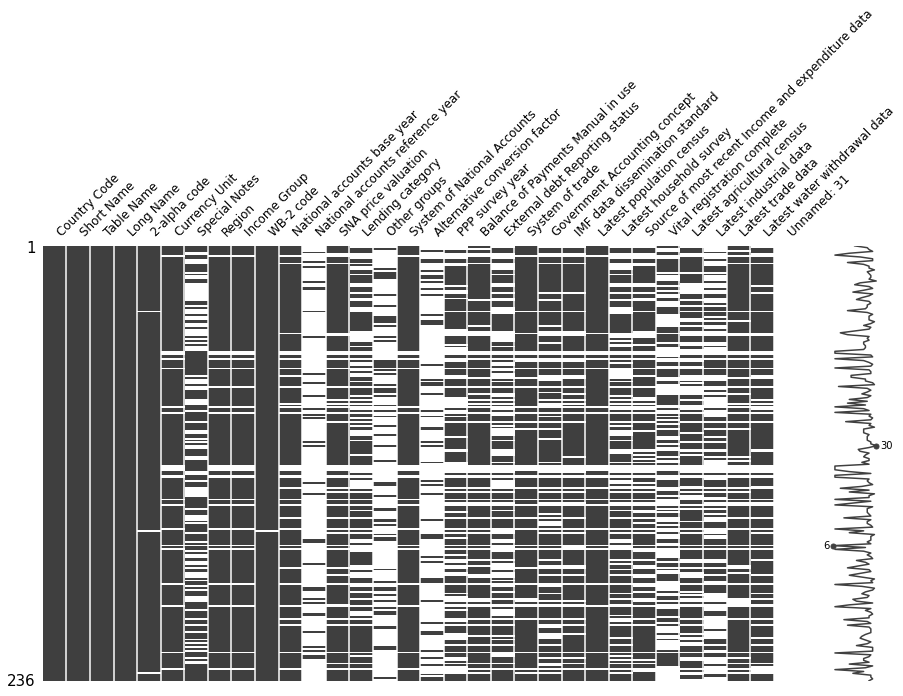

In [13]:
# We can also plot the completion using Missingno
import missingno as msno

_ = msno.matrix(df=country, figsize=(15,8), fontsize=12)

There is a lot of missing data, and the last column is empty.

## 2.2. CountrySeries dataset

In [14]:
# Let's have a look at its shape
print("This dataset contains {} rows and {} columns".format(
    countrySeries.shape[0], countrySeries.shape[1]))

This dataset contains 613 rows and 4 columns


In [15]:
# We then have an overview of what information it contains
print(tabulate(countrySeries.head(7), headers='keys', tablefmt='github'))

|    | CountryCode   | SeriesCode        | DESCRIPTION                                              |   Unnamed: 3 |
|----|---------------|-------------------|----------------------------------------------------------|--------------|
|  0 | ABW           | SP.POP.TOTL       | Data sources : United Nations World Population Prospects |          nan |
|  1 | ABW           | SP.POP.GROW       | Data sources: United Nations World Population Prospects  |          nan |
|  2 | AFG           | SP.POP.GROW       | Data sources: United Nations World Population Prospects  |          nan |
|  3 | AFG           | NY.GDP.PCAP.PP.CD | Estimates are based on regression.                       |          nan |
|  4 | AFG           | SP.POP.TOTL       | Data sources : United Nations World Population Prospects |          nan |
|  5 | AFG           | NY.GDP.MKTP.PP.KD | Estimates are based on regression.                       |          nan |
|  6 | AFG           | NY.GNP.MKTP.PP.CD | Estimates are based o

This table seems to be a mapping between Country and Series.

In [16]:
# We then gather some basic information
countrySeries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


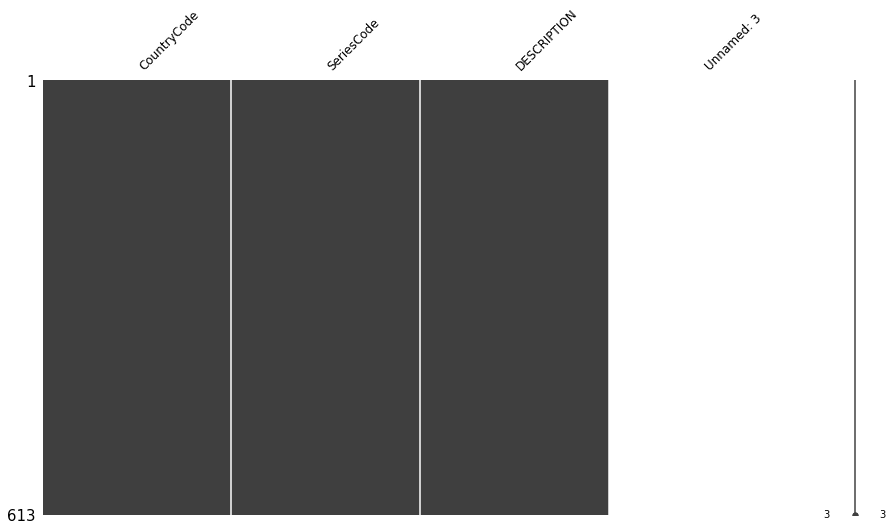

In [17]:
# We can also plot the completion using Missingno
_ = msno.matrix(df=countrySeries, figsize=(15,8), fontsize=12)

The last column will not be considered as it is empty.

## 2.3. Data dataset

In [18]:
# Let's have a look at its shape
print("This dataset contains {} rows and {} columns".format(
    data.shape[0], data.shape[1]))

This dataset contains 886930 rows and 70 columns


In [19]:
# We then have an overview of what information it contains
print(tabulate(data.head(7), headers='keys', tablefmt='github'))

|    | Country Name   | Country Code   | Indicator Name                                                          | Indicator Code   |      1970 |     1971 |      1972 |      1973 |      1974 |      1975 |      1976 |      1977 |      1978 |      1979 |      1980 |      1981 |      1982 |      1983 |      1984 |      1985 |      1986 |      1987 |      1988 |      1989 |      1990 |      1991 |      1992 |      1993 |      1994 |      1995 |      1996 |      1997 |      1998 |      1999 |      2000 |      2001 |      2002 |     2003 |      2004 |      2005 |      2006 |      2007 |     2008 |      2009 |      2010 |     2011 |      2012 |      2013 |     2014 |   2015 |   2016 |   2017 |   2020 |   2025 |   2030 |   2035 |   2040 |   2045 |   2050 |   2055 |   2060 |   2065 |   2070 |   2075 |   2080 |   2085 |   2090 |   2095 |   2100 |   Unnamed: 69 |
|----|----------------|----------------|-------------------------------------------------------------------------|------------------|--

This table seems to be the main dataset, which contains the actual indicators, listed by countries (multiple rows by country).

Each row countains the evolution for 1 indicator for 1 country, over several years (listed in columns).

In [20]:
# We then gather some basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

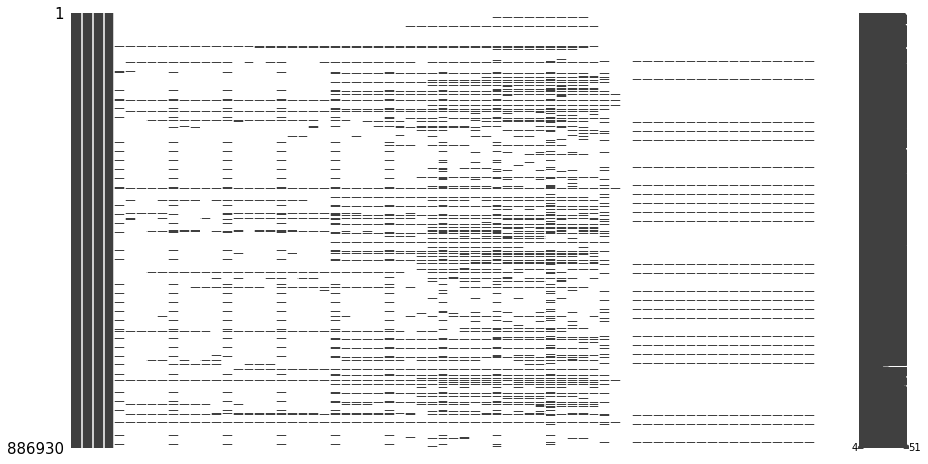

In [21]:
# We can also plot the completion using Missingno
_ = msno.matrix(df=data, figsize=(15,8), fontsize=12)

Last column is empty, so it will be discarded.

## 2.4. FootNote dataset

In [22]:
# Let's have a look at its shape
print("This dataset contains {} rows and {} columns".format(
    footNote.shape[0], footNote.shape[1]))

This dataset contains 643638 rows and 5 columns


In [23]:
# We then have an overview of what information it contains
print(tabulate(footNote.head(7), headers='keys', tablefmt='github'))

|    | CountryCode   | SeriesCode        | Year   | DESCRIPTION         |   Unnamed: 4 |
|----|---------------|-------------------|--------|---------------------|--------------|
|  0 | ABW           | SE.PRE.ENRL.FE    | YR2001 | Country estimation. |          nan |
|  1 | ABW           | SE.TER.TCHR.FE    | YR2005 | Country estimation. |          nan |
|  2 | ABW           | SE.PRE.TCHR.FE    | YR2000 | Country estimation. |          nan |
|  3 | ABW           | SE.SEC.ENRL.GC    | YR2004 | Country estimation. |          nan |
|  4 | ABW           | SE.PRE.TCHR       | YR2006 | Country estimation. |          nan |
|  5 | ABW           | SE.PRE.NENR       | YR2000 | Country estimation. |          nan |
|  6 | ABW           | SE.SEC.ENRL.VO.FE | YR2005 | Country estimation. |          nan |


This table seems to also be a mapping between Country and Series, but with an added column 'Year'. It would seem that each year an indicator is filled for a country there would be a record here.

1 row = 1 country, 1 indicator, 1 year.

In [24]:
# We then gather some basic information
footNote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


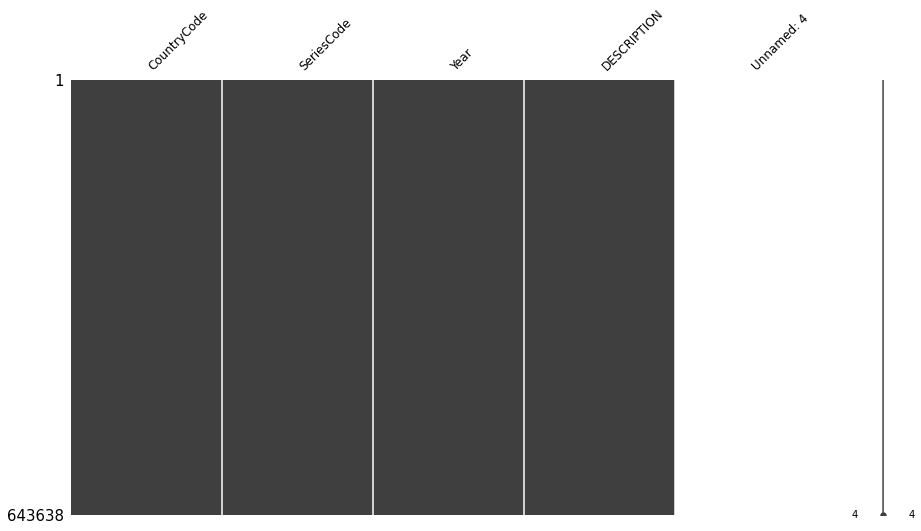

In [25]:
# We can also plot the completion using Missingno
_ = msno.matrix(df=footNote, figsize=(15,8), fontsize=12)

## 2.5. Series dataset

In [26]:
# Let's have a look at its shape
print("This dataset contains {} rows and {} columns".format(
    series.shape[0], series.shape[1]))

This dataset contains 3665 rows and 21 columns


In [27]:
# We then have an overview of what information it contains
print(tabulate(series.head(7), headers='keys', tablefmt='github'))

|    | Series Code         | Topic      | Indicator Name                                                         | Short definition                                            | Long definition                                             |   Unit of measure |   Periodicity |   Base Period |   Other notes |   Aggregation method |   Limitations and exceptions |   Notes from original source |   General comments | Source                                                     |   Statistical concept and methodology |   Development relevance |   Related source links |   Other web links |   Related indicators |   License Type |   Unnamed: 20 |
|----|---------------------|------------|------------------------------------------------------------------------|-------------------------------------------------------------|-------------------------------------------------------------|-------------------|---------------|---------------|---------------|----------------------|------------------------------

This table gives the explanation of the Series codes.

'Short definition' and 'Long definition' seem redundant with 'Indicator Name'.

In [28]:
# We then gather some basic information
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

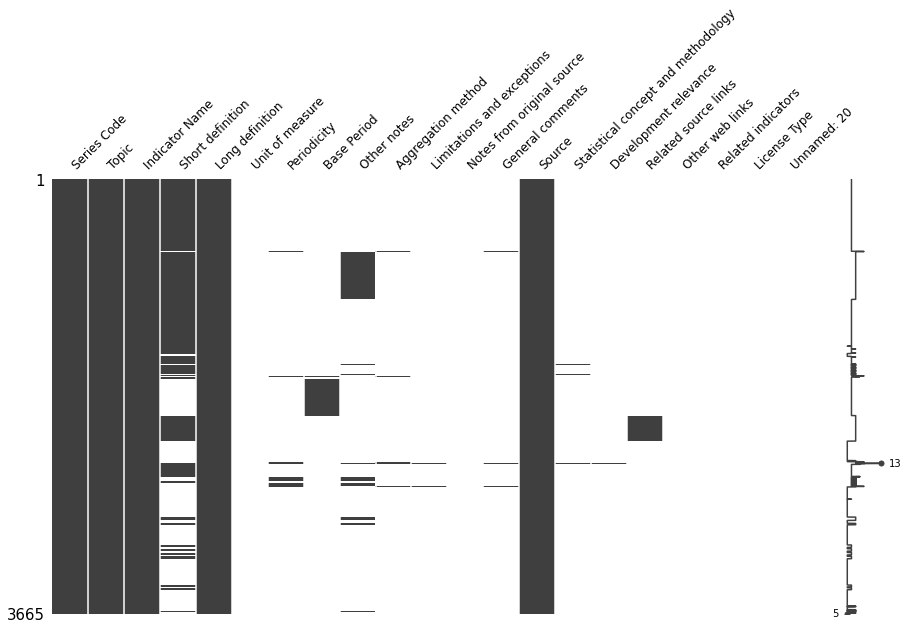

In [29]:
# We can also plot the completion using Missingno
_ = msno.matrix(df=series, figsize=(15,8), fontsize=12)

There is a lot of missing data, including the last column.

# 3. Data preparation (cleaning and completion)

## 3.1. Column selection

From what we have seen previously, the datasets countrySeries and footNote contain redundant from data, so they are discarded.

In [30]:
# Since I also want 'fresh' data, I define a recency filter to year 2000
recency_filter = 2000

### 3.1.1. country dataset

In [31]:
list(country.columns)

['Country Code',
 'Short Name',
 'Table Name',
 'Long Name',
 '2-alpha code',
 'Currency Unit',
 'Special Notes',
 'Region',
 'Income Group',
 'WB-2 code',
 'National accounts base year',
 'National accounts reference year',
 'SNA price valuation',
 'Lending category',
 'Other groups',
 'System of National Accounts',
 'Alternative conversion factor',
 'PPP survey year',
 'Balance of Payments Manual in use',
 'External debt Reporting status',
 'System of trade',
 'Government Accounting concept',
 'IMF data dissemination standard',
 'Latest population census',
 'Latest household survey',
 'Source of most recent Income and expenditure data',
 'Vital registration complete',
 'Latest agricultural census',
 'Latest industrial data',
 'Latest trade data',
 'Latest water withdrawal data',
 'Unnamed: 31']

In [33]:
# From country, we only keep: 'Country Code', 'Table Name', 'Region', 
# 'Income Group', 'Latest population census'
keep_country = ['Country Code', 'Table Name', 'Region', 'Income Group', 
                'Latest population census']

country_short = country[keep_country]

Since we also want to work on relatively recent data, I will filter on the lastest population census.

In [34]:
# What are the unique values here?
country_short['Latest population census'].unique()

array(['2010', '1979', '1970', '2011',
       '2011. Population figures compiled from administrative registers.',
       nan, '2009', '2008', '2013', '2006', '2012', '2005', '2003',
       'Guernsey: 2009; Jersey: 2011.', '1998', '1984', '2007',
       '2006. Rolling census based on continuous sample survey.', '2002',
       '1996',
       '2011. The population censuses for 1986 and 1996 were based on a one-in-seven sample of the population, while that for 2006 was based on a one-in-ten sample of the population.',
       '1997', '2004', '1993', '1983', '1987', '2001', '1989'],
      dtype=object)

In [35]:
# First I create a dictionnary to map to the news values:
new_vals = {1970:['1970'], 
            1979:['1979'], 
            1983:['1983'], 
            1984:['1984'], 
            1987:['1987'], 
            1989:['1989'], 
            1993:['1993'], 
            1996:['1996'], 
            1997:['1997'], 
            1998:['1998'], 
            2001:['2001'], 
            2002:['2002'], 
            2003:['2003'], 
            2004:['2004'], 
            2005:['2005'], 
            2006:['2006', 
                  '2006. Rolling census based on continuous sample survey.'], 
            2007:['2007'], 
            2008:['2008'], 
            2009:['2009'], 
            2010:['2010'], 
            2011:['2011', 
                  '2011. Population figures compiled from administrative registers.', 
                  'Guernsey: 2009; Jersey: 2011.', 
                  '2011. The population censuses for 1986 and 1996 were based on a one-in-seven sample of the population, while that for 2006 was based on a one-in-ten sample of the population.'], 
            2012:['2012'], 
            2013:['2013']
            }

# I then swap the keys to create a dictonnary that I can use:
map_dict = {k: oldk for oldk, oldv in new_vals.items() for k in oldv}

In [36]:
# I now create my new column:
country_short['LatestPopCensus_num'] = country_short['Latest population census'].\
  map(map_dict).fillna(0).astype('int')

<ipython-input-36-5db718c15c9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_short['LatestPopCensus_num'] = country_short['Latest population census'].\


In [37]:
# I can now drop the column 'Latest population census'
country_short = country_short.drop(columns=['Latest population census'], 
                                   inplace=False).copy()
country_short.head()

,Country Code,Table Name,Region,Income Group,LatestPopCensus_num
0,ABW,Aruba,Latin America & Caribbean,High income: nonOECD,2010
1,AFG,Afghanistan,South Asia,Low income,1979
2,AGO,Angola,Sub-Saharan Africa,Upper middle income,1970
3,ALB,Albania,Europe & Central Asia,Upper middle income,2011
4,AND,Andorra,Europe & Central Asia,High income: nonOECD,2011


In [38]:
# I filter my data by selecting only recent values (after 2000)
country_filtered = country_short.loc[
    country_short['LatestPopCensus_num']>=recency_filter]

In [39]:
# I can now drop the column 'LatestPopCensus_num'
country_filtered = country_filtered.drop(columns=['LatestPopCensus_num'], 
                                         inplace=False).copy()

In [40]:
# Let's perform some basic check
country_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 240
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  200 non-null    object
 1   Table Name    200 non-null    object
 2   Region        199 non-null    object
 3   Income Group  199 non-null    object
dtypes: object(4)
memory usage: 7.8+ KB


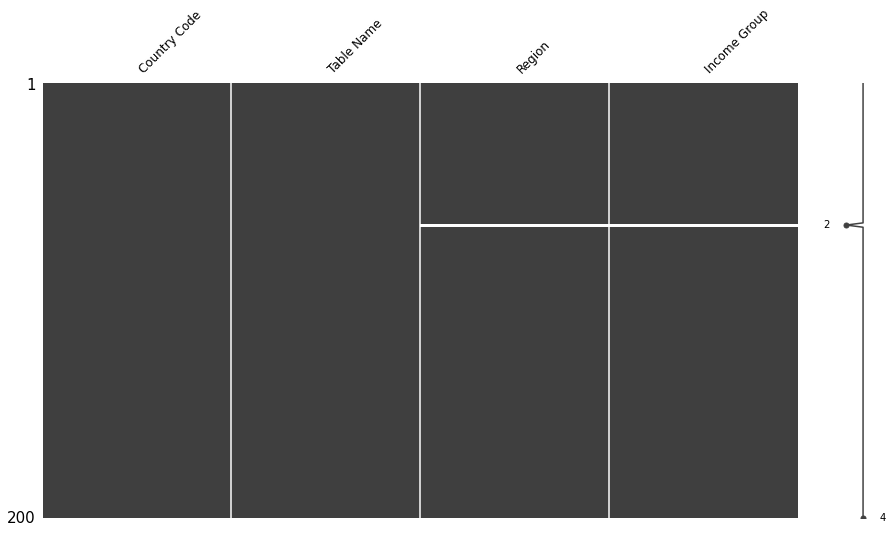

In [41]:
_ = msno.matrix(df=country_filtered, figsize=(15,8), fontsize=12)

### 3.1.2. data dataset

In [42]:
list(data.columns)

['Country Name',
 'Country Code',
 'Indicator Name',
 'Indicator Code',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2020',
 '2025',
 '2030',
 '2035',
 '2040',
 '2045',
 '2050',
 '2055',
 '2060',
 '2065',
 '2070',
 '2075',
 '2080',
 '2085',
 '2090',
 '2095',
 '2100',
 'Unnamed: 69']

In [50]:
# From data_ds, we only keep: 'Country Code', 'Indicator Code' and years 
# after 2000 (the recency filter). 2017 is empty so I do not keep the column.
# The years after 2017 feel like speculation, so I do not consider them.
keep_data = ['Country Code', 'Indicator Code', '2000','2001', '2002', '2003', 
             '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', 
             '2012', '2013', '2014', '2015', '2016']

data_short = data[keep_data]

In [51]:
# Let's perform some basic check
data_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Code    886930 non-null  object 
 1   Indicator Code  886930 non-null  object 
 2   2000            176676 non-null  float64
 3   2001            123509 non-null  float64
 4   2002            124205 non-null  float64
 5   2003            130363 non-null  float64
 6   2004            128814 non-null  float64
 7   2005            184108 non-null  float64
 8   2006            140312 non-null  float64
 9   2007            137272 non-null  float64
 10  2008            134387 non-null  float64
 11  2009            142108 non-null  float64
 12  2010            242442 non-null  float64
 13  2011            146012 non-null  float64
 14  2012            147264 non-null  float64
 15  2013            137509 non-null  float64
 16  2014            113789 non-null  float64
 17  2015      

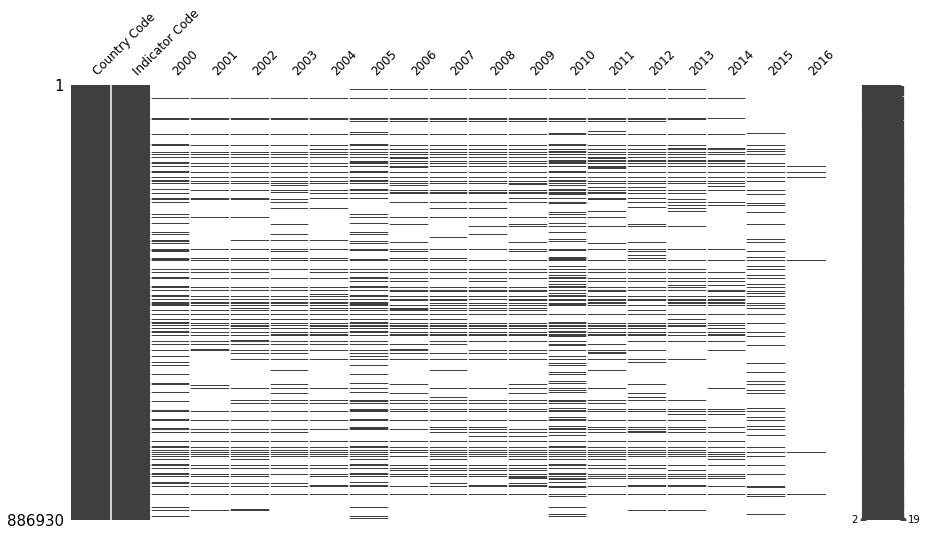

In [52]:
_ = msno.matrix(df=data_short, figsize=(15,8), fontsize=12)

### 3.1.3. series dataset

In [47]:
list(series.columns)

['Series Code',
 'Topic',
 'Indicator Name',
 'Short definition',
 'Long definition',
 'Unit of measure',
 'Periodicity',
 'Base Period',
 'Other notes',
 'Aggregation method',
 'Limitations and exceptions',
 'Notes from original source',
 'General comments',
 'Source',
 'Statistical concept and methodology',
 'Development relevance',
 'Related source links',
 'Other web links',
 'Related indicators',
 'License Type',
 'Unnamed: 20']

In [53]:
# From series_ds, we only keep: 'Series Code', 'Topic', 'Indicator Name'
keep_series = ['Series Code', 'Topic', 'Indicator Name']

series_short = series[keep_series]

In [54]:
# Let's perform some basic check
series_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Series Code     3665 non-null   object
 1   Topic           3665 non-null   object
 2   Indicator Name  3665 non-null   object
dtypes: object(3)
memory usage: 86.0+ KB


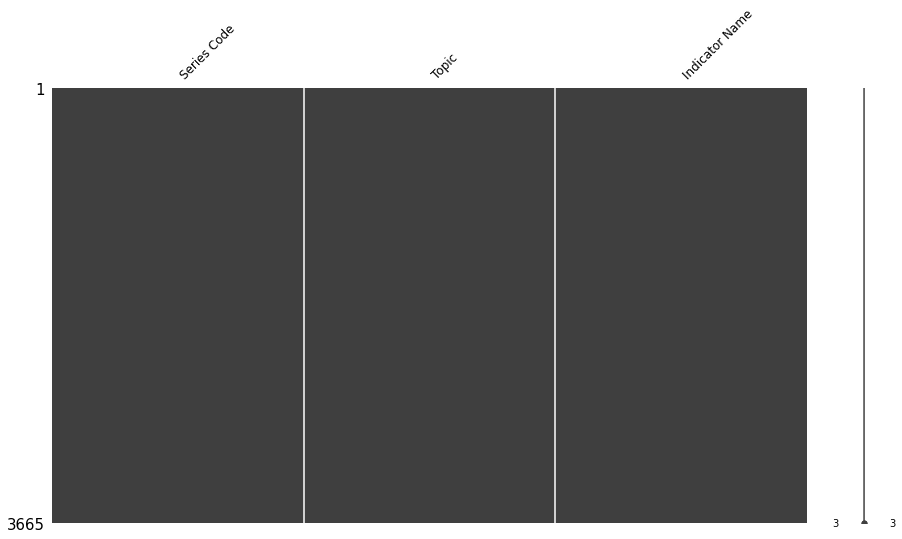

In [55]:
_ = msno.matrix(df=series_short, figsize=(15,8), fontsize=12)

## 3.2. Drop duplicates (if any)

In [56]:
# Let's delete the duplicates that may have appeared with the columns deletion:
print("country_filtered contains {} rows and {} columns".format(
    country_filtered.shape[0], country_filtered.shape[1]))
country_filtered = country_filtered.drop_duplicates(inplace=False, 
                                                    ignore_index=True).copy()
print("After de-duplication, country_filtered contains {} rows and {} columns".
      format(country_filtered.shape[0], country_filtered.shape[1]))

print("data_short contains {} rows and {} columns".format(
    data_short.shape[0], data_short.shape[1]))
data_short = data_short.drop_duplicates(inplace=False, ignore_index=True).copy()
print("After de-duplication, data_short contains {} rows and {} columns".
      format(data_short.shape[0], data_short.shape[1]))

print("series_short contains {} rows and {} columns".format(
    series_short.shape[0], series_short.shape[1]))
series_short = series_short.drop_duplicates(inplace=False, 
                                            ignore_index=True).copy()
print("After de-duplication, series_short contains {} rows and {} columns".
      format(series_short.shape[0], series_short.shape[1]))

country_filtered contains 200 rows and 4 columns
After de-duplication, country_filtered contains 200 rows and 4 columns
data_short contains 886930 rows and 19 columns
After de-duplication, data_short contains 886930 rows and 19 columns
series_short contains 3665 rows and 3 columns
After de-duplication, series_short contains 3665 rows and 3 columns


Looks like there are no duplicates!

## 3.3. Filter according to the problem:
- High internet access (online courses)
- Target level high-school to university (15-25 yrs)

### 3.3.1. Internet access

In [57]:
# Let's recall how what the dataframe looks like
print(tabulate(series_short.head(10), headers='keys', tablefmt='github'))

|    | Series Code         | Topic      | Indicator Name                                                         |
|----|---------------------|------------|------------------------------------------------------------------------|
|  0 | BAR.NOED.1519.FE.ZS | Attainment | Barro-Lee: Percentage of female population age 15-19 with no education |
|  1 | BAR.NOED.1519.ZS    | Attainment | Barro-Lee: Percentage of population age 15-19 with no education        |
|  2 | BAR.NOED.15UP.FE.ZS | Attainment | Barro-Lee: Percentage of female population age 15+ with no education   |
|  3 | BAR.NOED.15UP.ZS    | Attainment | Barro-Lee: Percentage of population age 15+ with no education          |
|  4 | BAR.NOED.2024.FE.ZS | Attainment | Barro-Lee: Percentage of female population age 20-24 with no education |
|  5 | BAR.NOED.2024.ZS    | Attainment | Barro-Lee: Percentage of population age 20-24 with no education        |
|  6 | BAR.NOED.2529.FE.ZS | Attainment | Barro-Lee: Percentage of female popula

In [58]:
# First, we want to focus on the internet access
# Let's define the keyword we're be looking at:
kw = 'Internet'

print('Keyword searched: {}\n'.format(kw))
print(tabulate(series_short[series_short['Indicator Name'].
                            str.contains(kw, regex=False, case=False)], 
               headers='keys', tablefmt='github'))

Keyword searched: Internet

|     | Series Code    | Topic                          | Indicator Name                  |
|-----|----------------|--------------------------------|---------------------------------|
| 611 | IT.NET.USER.P2 | Infrastructure: Communications | Internet users (per 100 people) |


In [59]:
# Let's keep this indicator somewhere
found_indic = []
found_indic.append('IT.NET.USER.P2')

Seems we got our indicator over here (IT.NET.USER.P2), let's keep it around.

### 3.3.2. Education

In [60]:
# Now, let's try to find about their education
kw = 'Education'

print('Keyword searched: {}\n'.format(kw))
print(tabulate(series_short[series_short['Indicator Name'].
                            str.contains(kw, regex=False, case=False)], 
               headers='keys', tablefmt='github'))

Keyword searched: Education

|      | Series Code                  | Topic                                            | Indicator Name                                                                                                                               |
|------|------------------------------|--------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------|
|    0 | BAR.NOED.1519.FE.ZS          | Attainment                                       | Barro-Lee: Percentage of female population age 15-19 with no education                                                                       |
|    1 | BAR.NOED.1519.ZS             | Attainment                                       | Barro-Lee: Percentage of population age 15-19 with no education                                                                              |
|    2 | BAR.NOED.15UP.FE.ZS       

In [61]:
# There are a lot of records, so let's try to narrow it down using the topic.
# What are the different topics here?
list(series_short[series_short['Indicator Name'].
                  str.contains(kw, regex=False, case=False)]['Topic'].unique())

['Attainment',
 'Education Equality',
 'Learning Outcomes',
 'Education Management Information Systems (SABER)',
 'School Health and School Feeding (SABER)',
 'School Finance (SABER)',
 'Teachers (SABER)',
 'Tertiary Education (SABER)',
 'Background',
 'Early Childhood Education',
 'Teachers',
 'Primary',
 'Secondary',
 'Tertiary',
 'Expenditures',
 'Social Protection & Labor: Labor force structure',
 'Laber',
 'Population',
 'Post-Secondary/Non-Tertiary',
 'Pre-Primary']

#### 3.3.2.1. By topic: Attainment

In [62]:
# Let's see what we have with the topic 'Attainment'
# Let's define the topic we're looking at:
topic = 'Attainment'

print('Keyword searched: {}\nTopic being searched: {}\n'.format(kw, topic))
print(tabulate(series_short[series_short['Indicator Name'].
                            str.contains(kw, regex=False, case=False) 
                            & series_short['Topic'].
                            str.contains(topic, regex=False, case=False)], 
               headers='keys', tablefmt='github'))

Keyword searched: Education
Topic being searched: Attainment

|      | Series Code            | Topic      | Indicator Name                                                                                                                   |
|------|------------------------|------------|----------------------------------------------------------------------------------------------------------------------------------|
|    0 | BAR.NOED.1519.FE.ZS    | Attainment | Barro-Lee: Percentage of female population age 15-19 with no education                                                           |
|    1 | BAR.NOED.1519.ZS       | Attainment | Barro-Lee: Percentage of population age 15-19 with no education                                                                  |
|    2 | BAR.NOED.15UP.FE.ZS    | Attainment | Barro-Lee: Percentage of female population age 15+ with no education                                                             |
|    3 | BAR.NOED.15UP.ZS       | Attainment | B

It's only about projections and percentages, that does not interest me here.

#### 3.3.2.2. By topic: Education Equality

In [63]:
# Let's see what we have with the topic 'Education Equality'
topic = 'Education Equality'

print('Keyword searched: {}\nTopic being searched: {}\n'.format(kw, topic))
print(tabulate(series_short[series_short['Indicator Name'].
                            str.contains(kw, regex=False, case=False) 
                            & series_short['Topic'].
                            str.contains(topic, regex=False, case=False)], 
               headers='keys', tablefmt='github'))

Keyword searched: Education
Topic being searched: Education Equality

|     | Series Code     | Topic              | Indicator Name                                                            |
|-----|-----------------|--------------------|---------------------------------------------------------------------------|
| 390 | HH.DHS.NIR.1    | Education Equality | DHS: Net intake rate for the first grade of primary education             |
| 391 | HH.DHS.NIR.1.F  | Education Equality | DHS: Net intake rate for the first grade of primary education. Female     |
| 392 | HH.DHS.NIR.1.M  | Education Equality | DHS: Net intake rate for the first grade of primary education. Male       |
| 393 | HH.DHS.NIR.1.Q1 | Education Equality | DHS: Net intake rate for the first grade of primary education. Quintile 1 |
| 394 | HH.DHS.NIR.1.Q2 | Education Equality | DHS: Net intake rate for the first grade of primary education. Quintile 2 |
| 395 | HH.DHS.NIR.1.Q3 | Education Equality | DHS: Net intake rate f

I will not use these indicators here.

#### 3.3.2.3. By topic: Learning Outcomes

In [64]:
# Let's see what we have with the topic 'Learning Outcomes'
topic = 'Learning Outcomes'

print('Keyword searched: {}\nTopic being searched: {}\n'.format(kw, topic))
print(tabulate(series_short[series_short['Indicator Name'].
                            str.contains(kw, regex=False, case=False) 
                            & series_short['Topic'].
                            str.contains(topic, regex=False, case=False)], 
               headers='keys', tablefmt='github'))

Keyword searched: Education
Topic being searched: Learning Outcomes

|      | Series Code            | Topic             | Indicator Name                                                                                                           |
|------|------------------------|-------------------|--------------------------------------------------------------------------------------------------------------------------|
| 1172 | LO.PASEC.MAT.2.NPP     | Learning Outcomes | PASEC: Mean performance on the mathematics scale for 2nd grade students who did not attend pre-primary education         |
| 1182 | LO.PASEC.MAT.2.PP      | Learning Outcomes | PASEC: Mean performance on the mathematics scale for 2nd grade students who attended pre-primary education               |
| 1183 | LO.PASEC.MAT.2.PP.GAP  | Learning Outcomes | PASEC: Average performance gap between 2nd grade students who attended/did not attend pre-primary education. Mathematics |
| 1184 | LO.PASEC.MAT.2.PRI.GAP | Learning Out

It's about performance, so I will not use these.

#### 3.3.2.4. By topic: related to SABER

In [65]:
# Let's see what we have with the topics related to 'SABER'
topic = 'SABER'

print('Keyword searched: {}\nTopic being searched: {}\n'.format(kw, topic))
print(tabulate(series_short[series_short['Indicator Name'].
                            str.contains(kw, regex=False, case=False) 
                            & series_short['Topic'].
                            str.contains(topic, regex=False, case=False)], 
               headers='keys', tablefmt='github'))

Keyword searched: Education
Topic being searched: SABER

|      | Series Code               | Topic                                            | Indicator Name                                                                                                                               |
|------|---------------------------|--------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------|
| 1994 | SABER.EMIS.GOAL1          | Education Management Information Systems (SABER) | SABER: (Education Management Information Systems) Policy Goal 1: Enabling Environment                                                        |
| 1995 | SABER.EMIS.GOAL1.LVL1     | Education Management Information Systems (SABER) | SABER: (Education Management Information Systems) Policy Goal 1 Lever 1: Legal Framework                                                     |
| 1996 | SABER.EMIS

These are about policies goals. I will not consider them.

#### 3.3.2.5. By topic: Background

In [66]:
# Let's see what we have with the topic 'Background'
topic = 'Background'

print('Keyword searched: {}\nTopic being searched: {}\n'.format(kw, topic))
print(tabulate(series_short[series_short['Indicator Name'].
                            str.contains(kw, regex=False, case=False) 
                            & series_short['Topic'].
                            str.contains(topic, regex=False, case=False)], 
               headers='keys', tablefmt='github'))

Keyword searched: Education
Topic being searched: Background

|      | Series Code   | Topic      | Indicator Name                                        |
|------|---------------|------------|-------------------------------------------------------|
| 2216 | SE.COM.DURS   | Background | Duration of compulsory education (years)              |
| 2724 | UIS.CEAge.1   | Background | Official entrance age to compulsory education (years) |


Not much here.

#### 3.3.2.6. By topic: Early Childhood Education

In [67]:
# Let's see what we have with the topic 'Early Childhood Education'
topic = 'Early Childhood Education'

print('Keyword searched: {}\nTopic being searched: {}\n'.format(kw, topic))
print(tabulate(series_short[series_short['Indicator Name'].
                            str.contains(kw, regex=False, case=False) 
                            & series_short['Topic'].
                            str.contains(topic, regex=False, case=False)], 
               headers='keys', tablefmt='github'))

Keyword searched: Education
Topic being searched: Early Childhood Education

|      | Series Code       | Topic                     | Indicator Name                                                                                             |
|------|-------------------|---------------------------|------------------------------------------------------------------------------------------------------------|
| 2221 | SE.PRE.ENRL       | Early Childhood Education | Enrolment in pre-primary education, both sexes (number)                                                    |
| 2222 | SE.PRE.ENRL.FE    | Early Childhood Education | Enrolment in pre-primary education, female (number)                                                        |
| 2223 | SE.PRE.ENRL.FE.ZS | Early Childhood Education | Percentage of students in pre-primary education who are female (%)                                         |
| 2231 | SE.PRE.PRIV.ZS    | Early Childhood Education | Percentage of enrolment in pre-prima

The target is too young here (as expected should I say).

#### 3.3.2.7. By topic: Teachers

In [68]:
# Let's see what we have with the topic 'Teachers'
topic = 'Teachers'

print('Keyword searched: {}\nTopic being searched: {}\n'.format(kw, topic))
print(tabulate(series_short[series_short['Indicator Name'].
                            str.contains(kw, regex=False, case=False) 
                            & series_short['Topic'].
                            str.contains(topic, regex=False, case=False)], 
               headers='keys', tablefmt='github'))

Keyword searched: Education
Topic being searched: Teachers

|      | Series Code            | Topic            | Indicator Name                                                                                                         |
|------|------------------------|------------------|------------------------------------------------------------------------------------------------------------------------|
| 2160 | SABER.TECH.GOAL3.LVL1  | Teachers (SABER) | SABER: (Teachers) Policy Goal 3 Lever 1: Are there minimum standards for pre-service teaching education programs?      |
| 2166 | SABER.TECH.GOAL5.LVL1  | Teachers (SABER) | SABER: (Teachers) Policy Goal 5 Lever 1: Does the education system invest in developing qualified school leaders?      |
| 2224 | SE.PRE.ENRL.TC.ZS      | Teachers         | Pupil-teacher ratio in pre-primary education (headcount basis)                                                         |
| 2232 | SE.PRE.TCHR            | Teachers         | Teachers in pre-p

In [69]:
# From these indicators, some could prove useful:
teachers_indic = ['Teachers in secondary education, both sexes (number)', 
                  'Teachers in tertiary education programmes, both sexes (number)', 
                  'Teachers in secondary general education, both sexes (number)', 
                  'Teachers in upper secondary education, both sexes (number)', 
                  'Teachers in post-secondary non-tertiary education, both sexes (number)', 
                  'Teachers in tertiary education ISCED 5 programmes, both sexes (number)']

print(tabulate(series_short[series_short['Indicator Name'].
                            isin(teachers_indic)], 
               headers='keys', tablefmt='github'))

|      | Series Code   | Topic    | Indicator Name                                                         |
|------|---------------|----------|------------------------------------------------------------------------|
| 2326 | SE.SEC.TCHR   | Teachers | Teachers in secondary education, both sexes (number)                   |
| 2369 | SE.TER.TCHR   | Teachers | Teachers in tertiary education programmes, both sexes (number)         |
| 3523 | UIS.T.23.GPV  | Teachers | Teachers in secondary general education, both sexes (number)           |
| 3527 | UIS.T.3       | Teachers | Teachers in upper secondary education, both sexes (number)             |
| 3529 | UIS.T.4       | Teachers | Teachers in post-secondary non-tertiary education, both sexes (number) |
| 3531 | UIS.T.5.B     | Teachers | Teachers in tertiary education ISCED 5 programmes, both sexes (number) |


In [70]:
# Let's add them to the list:
# For each indicator, we need to retrieve its associated 'Series Code'
# We then extract its 'values', and the [0] enables the access to the raw value
for item in teachers_indic:
  found_indic.append(series_short[series_short['Indicator Name'] == item]
                     ['Series Code'].values[0])

#### 3.3.2.8. By topic: Primary

In [71]:
# Let's continue and see what we have with the topic 'Primary'
topic = 'Primary'

print('Keyword searched: {}\nTopic being searched: {}\n'.format(kw, topic))
print(tabulate(series_short[series_short['Indicator Name'].
                            str.contains(kw, regex=False, case=False) 
                            & series_short['Topic'].
                            str.contains(topic, regex=False, case=False)], 
               headers='keys', tablefmt='github'))

Keyword searched: Education
Topic being searched: Primary

|      | Series Code              | Topic       | Indicator Name                                                                                                                    |
|------|--------------------------|-------------|-----------------------------------------------------------------------------------------------------------------------------------|
| 2235 | SE.PRM.AGES              | Primary     | Official entrance age to primary education (years)                                                                                |
| 2236 | SE.PRM.CMPL.FE.ZS        | Primary     | Gross graduation ratio from primary education, female (%)                                                                         |
| 2237 | SE.PRM.CMPL.MA.ZS        | Primary     | Gross graduation ratio from primary education, male (%)                                                                           |
| 2238 | SE.PRM.CMPL.ZS        

As expected, these indicators do not interest us.

#### 3.3.2.9. By topic: Secondary

In [72]:
# Let's see what we have with the topic 'Secondary'
topic = 'Secondary'

print('Keyword searched: {}\nTopic being searched: {}\n'.format(kw, topic))
print(tabulate(series_short[series_short['Indicator Name'].
                            str.contains(kw, regex=False, case=False) 
                            & series_short['Topic'].
                            str.contains(topic, regex=False, case=False)], 
               headers='keys', tablefmt='github'))

Keyword searched: Education
Topic being searched: Secondary

|      | Series Code             | Topic                       | Indicator Name                                                                                                       |
|------|-------------------------|-----------------------------|----------------------------------------------------------------------------------------------------------------------|
| 2287 | SE.SEC.AGES             | Secondary                   | Official entrance age to lower secondary education (years)                                                           |
| 2291 | SE.SEC.DURS             | Secondary                   | Theoretical duration of secondary education (years)                                                                  |
| 2292 | SE.SEC.DURS.LO          | Secondary                   | Theoretical duration of lower secondary education (years)                                                            |
| 2293 | SE.SEC.DUR

In [73]:
# From these indicators, some of them could prove useful:
secondary_indic = ['Enrolment in secondary education, both sexes (number)', 
                   'Enrolment in secondary education, private institutions, both sexes (number)', 
                   'Enrolment in secondary education, public institutions, both sexes (number)',
                   'Enrolment in upper secondary education, both sexes (number)', 
                   'Enrolment in upper secondary education, private institutions, both sexes (number)', 
                   'Enrolment in upper secondary education, public institutions, both sexes (number)']

print(tabulate(series_short[series_short['Indicator Name'].
                            isin(secondary_indic)], 
               headers='keys', tablefmt='github'))

|      | Series Code   | Topic     | Indicator Name                                                                    |
|------|---------------|-----------|-----------------------------------------------------------------------------------|
| 2294 | SE.SEC.ENRL   | Secondary | Enrolment in secondary education, both sexes (number)                             |
| 2821 | UIS.E.23.PR   | Secondary | Enrolment in secondary education, private institutions, both sexes (number)       |
| 2823 | UIS.E.23.Pu   | Secondary | Enrolment in secondary education, public institutions, both sexes (number)        |
| 2825 | UIS.E.3       | Secondary | Enrolment in upper secondary education, both sexes (number)                       |
| 2829 | UIS.E.3.PR    | Secondary | Enrolment in upper secondary education, private institutions, both sexes (number) |
| 2831 | UIS.E.3.PU    | Secondary | Enrolment in upper secondary education, public institutions, both sexes (number)  |


In [74]:
# Let's add them to the list:
for item in secondary_indic:
  found_indic.append(series_short[series_short['Indicator Name'] == item]
                     ['Series Code'].values[0])

#### 3.3.2.10. By topic: Tertiary

In [75]:
# Let's continue and see what we have with the topic 'Tertiary'
topic = 'Tertiary'

print('Keyword searched: {}\nTopic being searched: {}\n'.format(kw, topic))
print(tabulate(series_short[series_short['Indicator Name'].
                            str.contains(kw, regex=False, case=False) 
                            & series_short['Topic'].
                            str.contains(topic, regex=False, case=False)], 
               headers='keys', tablefmt='github'))

Keyword searched: Education
Topic being searched: Tertiary

|      | Series Code           | Topic                       | Indicator Name                                                                                                                               |
|------|-----------------------|-----------------------------|----------------------------------------------------------------------------------------------------------------------------------------------|
| 2180 | SABER.TER.GOAL1       | Tertiary Education (SABER)  | SABER: (Tertiary Education) Policy Goal 1: Vision for Tertiary Education                                                                     |
| 2181 | SABER.TER.GOAL1.LVL1  | Tertiary Education (SABER)  | SABER: (Tertiary Education) Policy Goal 1 Lever 1: Clear vision                                                                              |
| 2182 | SABER.TER.GOAL2       | Tertiary Education (SABER)  | SABER: (Tertiary Education) Policy Goal 2: Regulatory

Here, I am using a reference to [Wikipedia](https://en.wikipedia.org/wiki/International_Standard_Classification_of_Education) to understand that:
- ISCED 5 corresponds to short-cycle tertiary education and prepare for labour market entry,
- ISCED 6 corresponds to a Bachelor's,
- ISCED 7 corresponds to a Master's,
- ISCED 8 corresponds to a Doctorate.

In [76]:
# From these indicators, some of them could prove useful:
tertiary_indic = ['Enrolment in tertiary education, all programmes, both sexes (number)', 
                  'Graduates from tertiary education, both sexes (number)', 
                  'Enrolment in post-secondary non-tertiary education, both sexes (number)', 
                  'Enrolment in post-secondary non-tertiary education, private institutions, both sexes (number)', 
                  'Enrolment in post-secondary non-tertiary education, public institutions, both sexes (number)', 
                  'Enrolment in tertiary education, ISCED 5 programmes, both sexes (number)', 
                  'Enrolment in tertiary education, ISCED 6 programmes, both sexes (number)', 
                  'Enrolment in tertiary education, ISCED 7 programmes, both sexes (number)', 
                  'Graduates from ISCED 5 programmes in tertiary education, both sexes (number)', 
                  'Graduates from ISCED 6 programmes in tertiary education, both sexes (number)', 
                  'Graduates from ISCED 7 programmes in tertiary education, both sexes (number)']

print(tabulate(series_short[series_short['Indicator Name'].
                            isin(tertiary_indic)], 
               headers='keys', tablefmt='github'))

|      | Series Code   | Topic                       | Indicator Name                                                                                |
|------|---------------|-----------------------------|-----------------------------------------------------------------------------------------------|
| 2332 | SE.TER.ENRL   | Tertiary                    | Enrolment in tertiary education, all programmes, both sexes (number)                          |
| 2338 | SE.TER.GRAD   | Tertiary                    | Graduates from tertiary education, both sexes (number)                                        |
| 2835 | UIS.E.4       | Tertiary                    | Enrolment in post-secondary non-tertiary education, both sexes (number)                       |
| 2837 | UIS.E.4.PR    | Post-Secondary/Non-Tertiary | Enrolment in post-secondary non-tertiary education, private institutions, both sexes (number) |
| 2839 | UIS.E.4.Pu    | Tertiary                    | Enrolment in post-secondary non-tertiar

In [77]:
# Let's add them to the list:
for item in tertiary_indic:
  found_indic.append(series_short[series_short['Indicator Name'] == item]
                     ['Series Code'].values[0])

#### 3.3.2.11. By topic: Expenditures

In [78]:
# Let's continue and see what we have with the topic 'Expenditures'
topic = 'Expenditures'

print('Keyword searched: {}\nTopic being searched: {}\n'.format(kw, topic))
print(tabulate(series_short[series_short['Indicator Name'].
                            str.contains(kw, regex=False, case=False) 
                            & series_short['Topic'].
                            str.contains(topic, regex=False, case=False)], 
               headers='keys', tablefmt='github'))

Keyword searched: Education
Topic being searched: Expenditures

|      | Series Code                  | Topic        | Indicator Name                                                                                                         |
|------|------------------------------|--------------|------------------------------------------------------------------------------------------------------------------------|
| 2375 | SE.XPD.PRIM.ZS               | Expenditures | Expenditure on primary as % of government expenditure on education (%)                                                 |
| 2377 | SE.XPD.SECO.ZS               | Expenditures | Expenditure on secondary as % of government expenditure on education (%)                                               |
| 2379 | SE.XPD.TERT.ZS               | Expenditures | Expenditure on tertiary as % of government expenditure on education (%)                                                |
| 2380 | SE.XPD.TOTL.GB.ZS            | Expenditures | E

In [79]:
# From these indicators, we can use the following:
expend_indic = ['Government expenditure on education as % of GDP (%)', 
                'Government expenditure in educational institutions as % of GDP (%)']

print(tabulate(series_short[series_short['Indicator Name'].
                            isin(expend_indic)], 
               headers='keys', tablefmt='github'))

|      | Series Code                  | Topic        | Indicator Name                                                     |
|------|------------------------------|--------------|--------------------------------------------------------------------|
| 2381 | SE.XPD.TOTL.GD.ZS            | Expenditures | Government expenditure on education as % of GDP (%)                |
| 3590 | UIS.XGDP.FSgov.FDinstadm.FFd | Expenditures | Government expenditure in educational institutions as % of GDP (%) |


In [80]:
# Let's add them to the list:
for item in expend_indic:
  found_indic.append(series_short[series_short['Indicator Name'] == item]
                     ['Series Code'].values[0])

#### 3.3.2.12. By topic: Social Protection & Labor: Labor force structure

In [81]:
# Let's continue and see what we have with the topic 
# 'Social Protection & Labor: Labor force structure'
topic = 'Social Protection & Labor: Labor force structure'

print('Keyword searched: {}\nTopic being searched: {}\n'.format(kw, topic))
print(tabulate(series_short[series_short['Indicator Name'].
                            str.contains(kw, regex=False, case=False) 
                            & series_short['Topic'].
                            str.contains(topic, regex=False, case=False)], 
               headers='keys', tablefmt='github'))

Keyword searched: Education
Topic being searched: Social Protection & Labor: Labor force structure

|      | Series Code       | Topic                                            | Indicator Name                                                                                                   |
|------|-------------------|--------------------------------------------------|------------------------------------------------------------------------------------------------------------------|
| 2384 | SL.TLF.ADVN.FE.ZS | Social Protection & Labor: Labor force structure | Labor force with advanced education, female (% of female working-age population with advanced education)         |
| 2385 | SL.TLF.ADVN.MA.ZS | Social Protection & Labor: Labor force structure | Labor force with advanced education, male (% of male working-age population with advanced education)             |
| 2386 | SL.TLF.ADVN.ZS    | Social Protection & Labor: Labor force structure | Labor force with advanced education (% o

As expected, not much can be used here.

#### 3.3.2.13. By topic: Laber

In [82]:
# Let's see what we have with the topic 'Laber'
topic = 'Laber'

print('Keyword searched: {}\nTopic being searched: {}\n'.format(kw, topic))
print(tabulate(series_short[series_short['Indicator Name'].
                            str.contains(kw, regex=False, case=False) 
                            & series_short['Topic'].
                            str.contains(topic, regex=False, case=False)], 
               headers='keys', tablefmt='github'))

Keyword searched: Education
Topic being searched: Laber

|      | Series Code       | Topic   | Indicator Name                                                                                 |
|------|-------------------|---------|------------------------------------------------------------------------------------------------|
| 2395 | SL.UEM.NEET.FE.ZS | Laber   | Share of youth not in education, employment or training, female (% of female youth population) |
| 2396 | SL.UEM.NEET.MA.ZS | Laber   | Share of youth not in education, employment or training, male (% of male youth population)     |
| 2397 | SL.UEM.NEET.ZS    | Laber   | Share of youth not in education, employment or training, total (% of youth population)         |


Could be useful, but 'youth' is not clearly defined.

#### 3.3.2.14. By topic: Population

In [83]:
# Let's continue and see what we have with the topic 'Population'
topic = 'Population'

print('Keyword searched: {}\nTopic being searched: {}\n'.format(kw, topic))
print(tabulate(series_short[series_short['Indicator Name'].
                            str.contains(kw, regex=False, case=False) 
                            & series_short['Topic'].
                            str.contains(topic, regex=False, case=False)], 
               headers='keys', tablefmt='github'))

Keyword searched: Education
Topic being searched: Population

|      | Series Code         | Topic      | Indicator Name                                                                                |
|------|---------------------|------------|-----------------------------------------------------------------------------------------------|
| 2595 | SP.PRE.TOTL.FE.IN   | Population | Population of the official age for pre-primary education, female (number)                     |
| 2596 | SP.PRE.TOTL.IN      | Population | Population of the official age for pre-primary education, both sexes (number)                 |
| 2597 | SP.PRE.TOTL.MA.IN   | Population | Population of the official age for pre-primary education, male (number)                       |
| 2598 | SP.PRM.GRAD.FE      | Population | Population of the official age for the last grade of primary education, female (number)       |
| 2599 | SP.PRM.GRAD.MA      | Population | Population of the official age for the last grade of p

In [84]:
# From these indicators, we can use the following:
pop_indic = ['Population of the official age for secondary education, both sexes (number)', 
             'Population of the official age for upper secondary education, both sexes (number)', 
             'Population of the official age for tertiary education, both sexes (number)', 
             'Population of the official age for post-secondary non-tertiary education, both sexes (number)']

print(tabulate(series_short[series_short['Indicator Name'].
                            isin(pop_indic)], 
               headers='keys', tablefmt='github'))

|      | Series Code    | Topic      | Indicator Name                                                                                |
|------|----------------|------------|-----------------------------------------------------------------------------------------------|
| 2608 | SP.SEC.TOTL.IN | Population | Population of the official age for secondary education, both sexes (number)                   |
| 2611 | SP.SEC.UTOT.IN | Population | Population of the official age for upper secondary education, both sexes (number)             |
| 2614 | SP.TER.TOTL.IN | Population | Population of the official age for tertiary education, both sexes (number)                    |
| 3473 | UIS.SAP.4      | Population | Population of the official age for post-secondary non-tertiary education, both sexes (number) |


In [85]:
# Let's add them to the list:
for item in pop_indic:
  found_indic.append(series_short[series_short['Indicator Name'] == item]
                     ['Series Code'].values[0])

#### 3.3.2.15. By topic: Post-Secondary/Non-Tertiary

In [86]:
# Let's continue and see what we have with the topic 
# 'Post-Secondary/Non-Tertiary'
topic = 'Post-Secondary/Non-Tertiary'

print('Keyword searched: {}\nTopic being searched: {}\n'.format(kw, topic))
print(tabulate(series_short[series_short['Indicator Name'].
                            str.contains(kw, regex=False, case=False) 
                            & series_short['Topic'].
                            str.contains(topic, regex=False, case=False)], 
               headers='keys', tablefmt='github'))

Keyword searched: Education
Topic being searched: Post-Secondary/Non-Tertiary

|      | Series Code      | Topic                       | Indicator Name                                                                                                       |
|------|------------------|-----------------------------|----------------------------------------------------------------------------------------------------------------------|
| 2837 | UIS.E.4.PR       | Post-Secondary/Non-Tertiary | Enrolment in post-secondary non-tertiary education, private institutions, both sexes (number)                        |
| 2838 | UIS.E.4.PR.F     | Post-Secondary/Non-Tertiary | Enrolment in post-secondary non-tertiary education, private institutions, female (number)                            |
| 2930 | UIS.FEP.4.GPV    | Post-Secondary/Non-Tertiary | Percentage of students in post-secondary non-tertiary general education who are female (%)                           |
| 2931 | UIS.FEP.4.V      | Post-Sec

Mainly percentages, so I will not use them.

#### 3.3.2.16. By topic: Pre-Primary

In [87]:
# Let's continue and see what we have with the topic 'Pre-Primary'
topic = 'Pre-Primary'

print('Keyword searched: {}\nTopic being searched: {}\n'.format(kw, topic))
print(tabulate(series_short[series_short['Indicator Name'].
                            str.contains(kw, regex=False, case=False) 
                            & series_short['Topic'].
                            str.contains(topic, regex=False, case=False)], 
               headers='keys', tablefmt='github'))

Keyword searched: Education
Topic being searched: Pre-Primary

|      | Series Code   | Topic       | Indicator Name                                         |
|------|---------------|-------------|--------------------------------------------------------|
| 3548 | UIS.thAge.0   | Pre-Primary | Official entrance age to pre-primary education (years) |
| 3551 | UIS.thDur.0   | Pre-Primary | Theoretical duration of pre-primary education (years)  |


We have a bunch of interesting indicators. Let's dive a bit deeper, and try to gather information about the population to set a basis for comparison.

### 3.3.3. Population

In [88]:
# Let's try to find about the population
kw = 'Population'

print('Keyword searched: {}\n'.format(kw))
print(tabulate(series_short[series_short['Indicator Name'].
                            str.contains(kw, regex=False, case=False)], 
               headers='keys', tablefmt='github'))

Keyword searched: Population

|      | Series Code               | Topic                                            | Indicator Name                                                                                                                           |
|------|---------------------------|--------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------|
|    0 | BAR.NOED.1519.FE.ZS       | Attainment                                       | Barro-Lee: Percentage of female population age 15-19 with no education                                                                   |
|    1 | BAR.NOED.1519.ZS          | Attainment                                       | Barro-Lee: Percentage of population age 15-19 with no education                                                                          |
|    2 | BAR.NOED.15UP.FE.ZS       | Attainment               

In [89]:
# Again, there are a lot of records, so let's try to narrow it down.
# What are the different topics here?
list(series_short[series_short['Indicator Name'].
                  str.contains(kw, regex=False, case=False)]['Topic'].unique())

['Attainment',
 'Literacy',
 'Health: Risk factors',
 'Social Protection & Labor: Labor force structure',
 'Laber',
 'Health: Population: Structure',
 'Population',
 'Health: Population: Dynamics']

#### 3.3.3.1. By topic: Attainment

In [90]:
# Let's see what we have with the topic 'Attainment'
# Let's define the topic we're looking at:
topic = 'Attainment'

print('Keyword searched: {}\nTopic being searched: {}\n'.format(kw, topic))
print(tabulate(series_short[series_short['Indicator Name'].
                            str.contains(kw, regex=False, case=False) 
                            & series_short['Topic'].
                            str.contains(topic, regex=False, case=False)], 
               headers='keys', tablefmt='github'))

Keyword searched: Population
Topic being searched: Attainment

|      | Series Code               | Topic      | Indicator Name                                                                                                                           |
|------|---------------------------|------------|------------------------------------------------------------------------------------------------------------------------------------------|
|    0 | BAR.NOED.1519.FE.ZS       | Attainment | Barro-Lee: Percentage of female population age 15-19 with no education                                                                   |
|    1 | BAR.NOED.1519.ZS          | Attainment | Barro-Lee: Percentage of population age 15-19 with no education                                                                          |
|    2 | BAR.NOED.15UP.FE.ZS       | Attainment | Barro-Lee: Percentage of female population age 15+ with no education                                                               

We could use some indicators with 'Barro-Lee', but since I don't exactly know what they mean and how they are measured, I will not use them.

#### 3.3.3.2. By topic: Literacy

In [91]:
# Let's continue with the topic 'Literacy'
topic = 'Literacy'

print('Keyword searched: {}\nTopic being searched: {}\n'.format(kw, topic))
print(tabulate(series_short[series_short['Indicator Name'].
                            str.contains(kw, regex=False, case=False) 
                            & series_short['Topic'].
                            str.contains(topic, regex=False, case=False)], 
               headers='keys', tablefmt='github'))

Keyword searched: Population
Topic being searched: Literacy

|      | Series Code          | Topic    | Indicator Name                                                         |
|------|----------------------|----------|------------------------------------------------------------------------|
| 2209 | SE.ADT.1524.LT.FE.ZS | Literacy | Youth literacy rate, population 15-24 years, female (%)                |
| 2210 | SE.ADT.1524.LT.FM.ZS | Literacy | Youth literacy rate, population 15-24 years, gender parity index (GPI) |
| 2211 | SE.ADT.1524.LT.MA.ZS | Literacy | Youth literacy rate, population 15-24 years, male (%)                  |
| 2212 | SE.ADT.1524.LT.ZS    | Literacy | Youth literacy rate, population 15-24 years, both sexes (%)            |
| 2213 | SE.ADT.LITR.FE.ZS    | Literacy | Adult literacy rate, population 15+ years, female (%)                  |
| 2214 | SE.ADT.LITR.MA.ZS    | Literacy | Adult literacy rate, population 15+ years, male (%)                    |
| 2215 | SE

In [92]:
# From these indicators, we can use the following one:
lit_indic = ['Youth illiterate population, 15-24 years, both sexes (number)']

print(tabulate(series_short[series_short['Indicator Name'].
                            isin(lit_indic)], 
               headers='keys', tablefmt='github'))

|      | Series Code    | Topic    | Indicator Name                                                |
|------|----------------|----------|---------------------------------------------------------------|
| 3052 | UIS.LP.Ag15t24 | Literacy | Youth illiterate population, 15-24 years, both sexes (number) |


In [93]:
# Let's add it to the list:
found_indic.append(lit_indic[0])

#### 3.3.3.3. By topic: Health: Risk factors

In [94]:
# Let's continue with the topic 'Health: Risk factors'
topic = 'Health: Risk factors'

print('Keyword searched: {}\nTopic being searched: {}\n'.format(kw, topic))
print(tabulate(series_short[series_short['Indicator Name'].
                            str.contains(kw, regex=False, case=False) 
                            & series_short['Topic'].
                            str.contains(topic, regex=False, case=False)], 
               headers='keys', tablefmt='github'))

Keyword searched: Population
Topic being searched: Health: Risk factors

|      | Series Code    | Topic                | Indicator Name                                        |
|------|----------------|----------------------|-------------------------------------------------------|
| 2382 | SH.DYN.AIDS.ZS | Health: Risk factors | Prevalence of HIV, total (% of population ages 15-49) |


Not very useful, let's move to the next one.

#### 3.3.3.4. By topic: Social Protection & Labor: Labor force structure

In [95]:
# 'Social Protection & Labor: Labor force structure'
topic = 'Social Protection & Labor: Labor force structure'

print('Keyword searched: {}\nTopic being searched: {}\n'.format(kw, topic))
print(tabulate(series_short[series_short['Indicator Name'].
                            str.contains(kw, regex=False, case=False) 
                            & series_short['Topic'].
                            str.contains(topic, regex=False, case=False)], 
               headers='keys', tablefmt='github'))

Keyword searched: Population
Topic being searched: Social Protection & Labor: Labor force structure

|      | Series Code       | Topic                                            | Indicator Name                                                                                                   |
|------|-------------------|--------------------------------------------------|------------------------------------------------------------------------------------------------------------------|
| 2384 | SL.TLF.ADVN.FE.ZS | Social Protection & Labor: Labor force structure | Labor force with advanced education, female (% of female working-age population with advanced education)         |
| 2385 | SL.TLF.ADVN.MA.ZS | Social Protection & Labor: Labor force structure | Labor force with advanced education, male (% of male working-age population with advanced education)             |
| 2386 | SL.TLF.ADVN.ZS    | Social Protection & Labor: Labor force structure | Labor force with advanced education (% 

Seems quite subjective (what do these levels of education mean?), so I am not using them.

#### 3.3.3.5. By topic: Laber

In [96]:
# Let's continue with the topic 'Laber'
topic = 'Laber'

print('Keyword searched: {}\nTopic being searched: {}\n'.format(kw, topic))
print(tabulate(series_short[series_short['Indicator Name'].
                            str.contains(kw, regex=False, case=False) 
                            & series_short['Topic'].
                            str.contains(topic, regex=False, case=False)], 
               headers='keys', tablefmt='github'))

Keyword searched: Population
Topic being searched: Laber

|      | Series Code       | Topic   | Indicator Name                                                                                 |
|------|-------------------|---------|------------------------------------------------------------------------------------------------|
| 2395 | SL.UEM.NEET.FE.ZS | Laber   | Share of youth not in education, employment or training, female (% of female youth population) |
| 2396 | SL.UEM.NEET.MA.ZS | Laber   | Share of youth not in education, employment or training, male (% of male youth population)     |
| 2397 | SL.UEM.NEET.ZS    | Laber   | Share of youth not in education, employment or training, total (% of youth population)         |


Not much to see here.

#### 3.3.3.6. By topic: Population

In [97]:
# Let's continue with the topic 'Population' 
# (including 'Health: Population: Structure' and 'Health: Population: Dynamics')
topic = 'Population'

print('Keyword searched: {}\nTopic being searched: {}\n'.format(kw, topic))
print(tabulate(series_short[series_short['Indicator Name'].
                            str.contains(kw, regex=False, case=False) 
                            & series_short['Topic'].
                            str.contains(topic, regex=False, case=False)], 
               headers='keys', tablefmt='github'))

Keyword searched: Population
Topic being searched: Population

|      | Series Code         | Topic                         | Indicator Name                                                                                |
|------|---------------------|-------------------------------|-----------------------------------------------------------------------------------------------|
| 2401 | SP.POP.0014.FE.IN   | Health: Population: Structure | Population ages 0-14, female                                                                  |
| 2402 | SP.POP.0014.MA.IN   | Health: Population: Structure | Population ages 0-14, male                                                                    |
| 2403 | SP.POP.0014.TO      | Health: Population: Structure | Population ages 0-14, total                                                                   |
| 2404 | SP.POP.0014.TO.ZS   | Health: Population: Structure | Population ages 0-14 (% of total)                                              

In [98]:
# From these indicators, we can use the following one:
pop2_indic = ['Population, ages 15-24, total', 
             'Population, total', 
             'Population of the official age for secondary education, both sexes (number)', 
             'Population of the official age for upper secondary education, both sexes (number)', 
             'Population of the official age for tertiary education, both sexes (number)', 
             'Population of the official age for post-secondary non-tertiary education, both sexes (number)']
# The last 4 indicators have already been seen with the keyword 'Education'

print(tabulate(series_short[series_short['Indicator Name'].
                            isin(pop2_indic)], 
               headers='keys', tablefmt='github'))

|      | Series Code       | Topic                         | Indicator Name                                                                                |
|------|-------------------|-------------------------------|-----------------------------------------------------------------------------------------------|
| 2506 | SP.POP.1524.TO.UN | Population                    | Population, ages 15-24, total                                                                 |
| 2590 | SP.POP.TOTL       | Health: Population: Structure | Population, total                                                                             |
| 2608 | SP.SEC.TOTL.IN    | Population                    | Population of the official age for secondary education, both sexes (number)                   |
| 2611 | SP.SEC.UTOT.IN    | Population                    | Population of the official age for upper secondary education, both sexes (number)             |
| 2614 | SP.TER.TOTL.IN    | Population                   

In [99]:
# Let's add them to the list:
for item in pop2_indic:
  found_indic.append(series_short[series_short['Indicator Name'] == item]
                     ['Series Code'].values[0])

That's enough indicators for now!

Let's recap what we could investigate here.

### 3.3.4. Review of the indicators

In [100]:
# Here's the list of all the indicators we consider:
list(found_indic)

['IT.NET.USER.P2',
 'SE.SEC.TCHR',
 'SE.TER.TCHR',
 'UIS.T.23.GPV',
 'UIS.T.3',
 'UIS.T.4',
 'UIS.T.5.B',
 'SE.SEC.ENRL',
 'UIS.E.23.PR',
 'UIS.E.23.Pu',
 'UIS.E.3',
 'UIS.E.3.PR',
 'UIS.E.3.PU',
 'SE.TER.ENRL',
 'SE.TER.GRAD',
 'UIS.E.4',
 'UIS.E.4.PR',
 'UIS.E.4.Pu',
 'UIS.E.5.B',
 'UIS.E.6',
 'UIS.E.7',
 'UIS.G.5.B.T',
 'UIS.G.6.T',
 'UIS.G.7.T',
 'SE.XPD.TOTL.GD.ZS',
 'UIS.XGDP.FSgov.FDinstadm.FFd',
 'SP.SEC.TOTL.IN',
 'SP.SEC.UTOT.IN',
 'SP.TER.TOTL.IN',
 'UIS.SAP.4',
 'Youth illiterate population, 15-24 years, both sexes (number)',
 'SP.POP.1524.TO.UN',
 'SP.POP.TOTL',
 'SP.SEC.TOTL.IN',
 'SP.SEC.UTOT.IN',
 'SP.TER.TOTL.IN',
 'UIS.SAP.4']

In [101]:
# Let's remove the duplicates:
indic_dd = [i for n, i in enumerate(found_indic) if i not in found_indic[:n]]

In [117]:
# Now, to match why I did during my formation, I'll use the same list I used
# For a deeper analysis, this block can be commented/deleted
indic_dd = ['IT.NET.USER.P2', 'SP.POP.1524.TO.UN', 'SP.POP.TOTL', 'UIS.E.3', 
            'SE.TER.ENRL']

In [118]:
# Now that we have the indicators that interest us, let's filter the 
# data_short dataframe, and discard the series_short dataframe:
data_filtered = data_short[data_short['Indicator Code'].isin(indic_dd)].copy()

In [119]:
# Let's review its shape:
print("data_filtered contains {} rows and {} columns".
      format(data_filtered.shape[0], data_filtered.shape[1]))

data_filtered contains 1210 rows and 19 columns


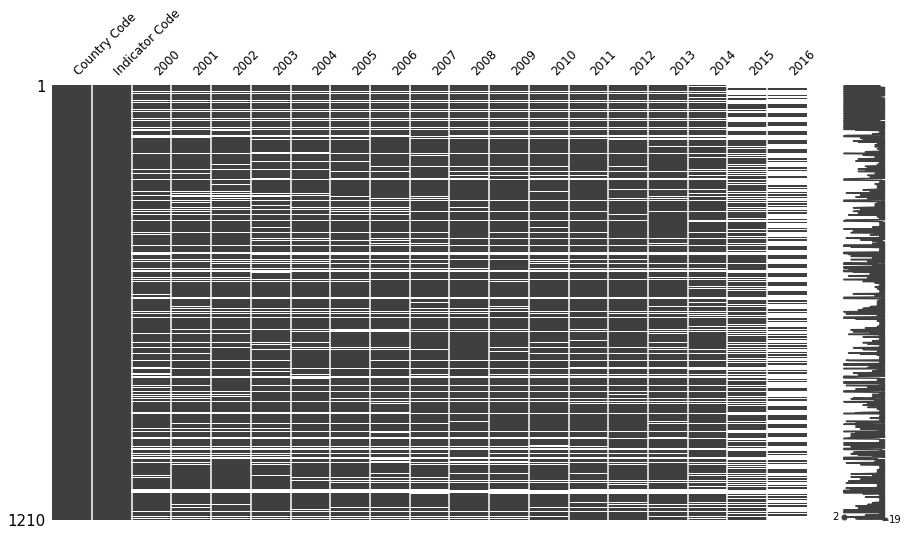

In [120]:
# We can also review its completion using Missingno
_ = msno.matrix(df=data_filtered, figsize=(15,8), fontsize=12)

In [121]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1210 entries, 1204 to 885798
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Code    1210 non-null   object 
 1   Indicator Code  1210 non-null   object 
 2   2000            973 non-null    float64
 3   2001            975 non-null    float64
 4   2002            989 non-null    float64
 5   2003            980 non-null    float64
 6   2004            993 non-null    float64
 7   2005            990 non-null    float64
 8   2006            978 non-null    float64
 9   2007            984 non-null    float64
 10  2008            985 non-null    float64
 11  2009            987 non-null    float64
 12  2010            987 non-null    float64
 13  2011            996 non-null    float64
 14  2012            990 non-null    float64
 15  2013            967 non-null    float64
 16  2014            928 non-null    float64
 17  2015            759 non-null

In [122]:
data_filtered.head()

,Country Code,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1204,ARB,SE.TER.ENRL,5.089854e+06,5.400639e+06,5.798696e+06,5.955514e+06,6.465715e+06,6.899156e+06,7.214648e+06,7.588664e+06,8.006892e+06,8.382284e+06,8.715273e+06,8.594488e+06,9.147083e+06,9.688632e+06,9966484.0,NaN,NaN
1214,ARB,UIS.E.3,8.554936e+06,9.096402e+06,9.393456e+06,1.018652e+07,1.074748e+07,1.073953e+07,1.070008e+07,1.037482e+07,1.030286e+07,1.017877e+07,1.064478e+07,1.162018e+07,1.202761e+07,1.202161e+07,11995984.0,NaN,NaN
1375,ARB,IT.NET.USER.P2,1.139541e+00,1.561288e+00,2.693061e+00,3.645881e+00,7.006812e+00,8.393142e+00,1.165465e+01,1.420590e+01,1.859353e+01,2.297369e+01,2.674725e+01,2.970776e+01,3.401422e+01,3.686860e+01,NaN,NaN,NaN
2482,ARB,SP.POP.1524.TO.UN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2533,ARB,SP.POP.TOTL,2.775614e+08,2.834931e+08,2.896810e+08,2.960959e+08,3.028247e+08,3.098244e+08,3.171258e+08,3.246935e+08,3.324249e+08,3.401490e+08,3.477370e+08,3.551370e+08,3.624666e+08,3.697615e+08,NaN,NaN,NaN


In [123]:
country_filtered.head()

,Country Code,Table Name,Region,Income Group
0,ABW,Aruba,Latin America & Caribbean,High income: nonOECD
1,ALB,Albania,Europe & Central Asia,Upper middle income
2,AND,Andorra,Europe & Central Asia,High income: nonOECD
3,ARE,United Arab Emirates,Middle East & North Africa,High income: nonOECD
4,ARG,Argentina,Latin America & Caribbean,Upper middle income


In [124]:
# Finally, let's create our dataframe to study
init_data = data_filtered.merge(country_filtered, 
                                how='left', 
                                left_on='Country Code', 
                                right_on='Country Code')

## 3.4. Data quality check

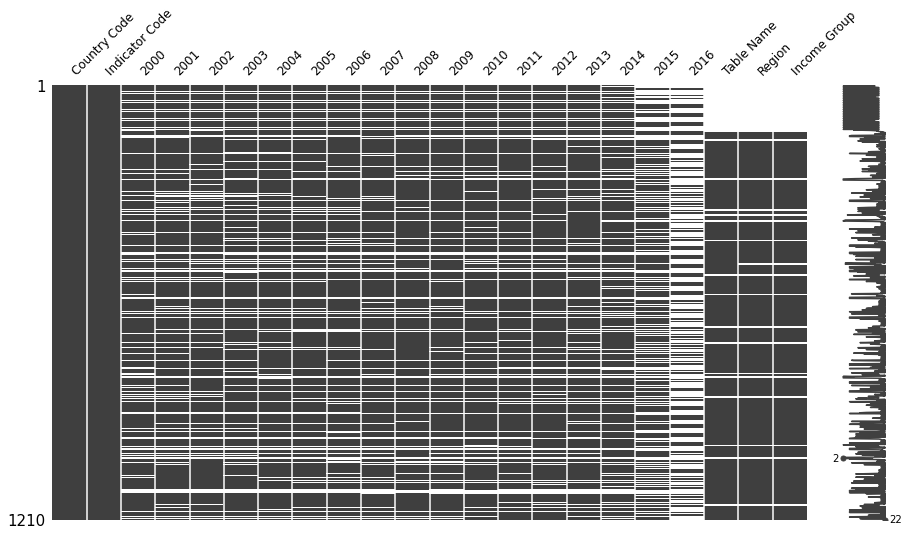

In [125]:
# Let's start with the missing values using Missingno
_ = msno.matrix(df=init_data, figsize=(15,8), fontsize=12)

In [127]:
# Now, let's unpivot on the years
init_data = pd.melt(init_data, 
                    id_vars=['Country Code', 'Indicator Code', 'Table Name', 
                             'Region', 'Income Group'],
                    var_name='Year', value_name='Indicator Value')
init_data.head()

,Country Code,Indicator Code,Table Name,Region,Income Group,Year,Indicator Value
0,ARB,SE.TER.ENRL,NaN,NaN,NaN,2000,5.089854e+06
1,ARB,UIS.E.3,NaN,NaN,NaN,2000,8.554936e+06
2,ARB,IT.NET.USER.P2,NaN,NaN,NaN,2000,1.139541e+00
3,ARB,SP.POP.1524.TO.UN,NaN,NaN,NaN,2000,NaN
4,ARB,SP.POP.TOTL,NaN,NaN,NaN,2000,2.775614e+08


In [128]:
init_data.shape

(20570, 7)

In [148]:
# Let's now sort the dataset
data_sorted = init_data.sort_values(
    by=['Country Code', 'Indicator Code', 'Year']).reset_index()
data_sorted.head()

,index,Country Code,Indicator Code,Table Name,Region,Income Group,Year,Indicator Value
0,172,ABW,IT.NET.USER.P2,Aruba,Latin America & Caribbean,High income: nonOECD,2000,15.442823
1,1382,ABW,IT.NET.USER.P2,Aruba,Latin America & Caribbean,High income: nonOECD,2001,17.100000
2,2592,ABW,IT.NET.USER.P2,Aruba,Latin America & Caribbean,High income: nonOECD,2002,18.800000
3,3802,ABW,IT.NET.USER.P2,Aruba,Latin America & Caribbean,High income: nonOECD,2003,20.800000
4,5012,ABW,IT.NET.USER.P2,Aruba,Latin America & Caribbean,High income: nonOECD,2004,23.000000


In [149]:
# Let's remove the countries with not enough indicator value
data_sorted['Country Code'][data_sorted['Indicator Value'].isnull()].value_counts()

NRU    80
VGB    79
SSD    71
MAF    71
CUW    69
       ..
CYP     4
CUB     4
ROU     4
IDN     4
NOR     4
Name: Country Code, Length: 242, dtype: int64